In [2]:
import tensorflow as tf
import os
import zipfile

In [4]:
#!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.aAppspot.com/horse-or-human.zip -O /datadrive/dataForSamplePrograms/horse-or-human.zip
#!wget --no-Qcheck-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /datadrive/dataForSamplePrograms/validation-horse-or-human.zip

#local_zip = '/datadrive/dataForSamplePrograms/horse-or-human.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/datadrive/dataForSamplePrograms/horse-or-human')
#local_zip = '/datadrive/dataForSamplePrograms/validation-horse-or-human.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/datadrive/dataForSamplePrograms/validation-horse-or-human')
#zip_ref.close()

--2020-06-11 21:24:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.4.80, 2607:f8b0:4009:805::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/datadrive/dataForSamplePrograms/validation-horse-or-human.zip’

/datadrive/dataForS 100%[===================>]  10.95M  33.0MB/s    in 0.3s    

2020-06-11 21:24:42 (33.0 MB/s) - ‘/datadrive/dataForSamplePrograms/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/datadrive/dataForSamplePrograms/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/datadrive/dataForSamplePrograms/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/datadrive/dataForSamplePrograms/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/datadrive/dataForSamplePrograms/validation-horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse08-6.png', 'horse49-2.png', 'horse37-7.png', 'horse15-6.png', 'horse17-7.png', 'horse16-9.png', 'horse18-4.png', 'horse28-0.png', 'horse37-1.png', 'horse46-3.png']
['human15-28.png', 'human02-10.png', 'human11-04.png', 'human02-01.png', 'human01-25.png', 'human02-24.png', 'human01-13.png', 'human03-22.png', 'human13-16.png', 'human10-13.png']
['horse3-440.png', 'horse4-188.png', 'horse6-544.png', 'horse1-105.png', 'horse5-360.png', 'horse1-276.png', 'horse4-232.png', 'horse2-069.png', 'horse1-127.png', 'horse4-503.png']
['valhuman05-21.png', 'valhuman04-04.png', 'valhuman05-09.png', 'valhuman04-21.png', 'valhuman04-08.png', 'valhuman05-12.png', 'valhuman02-05.png', 'valhuman02-02.png', 'valhuman05-26.png', 'valhuman02-16.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

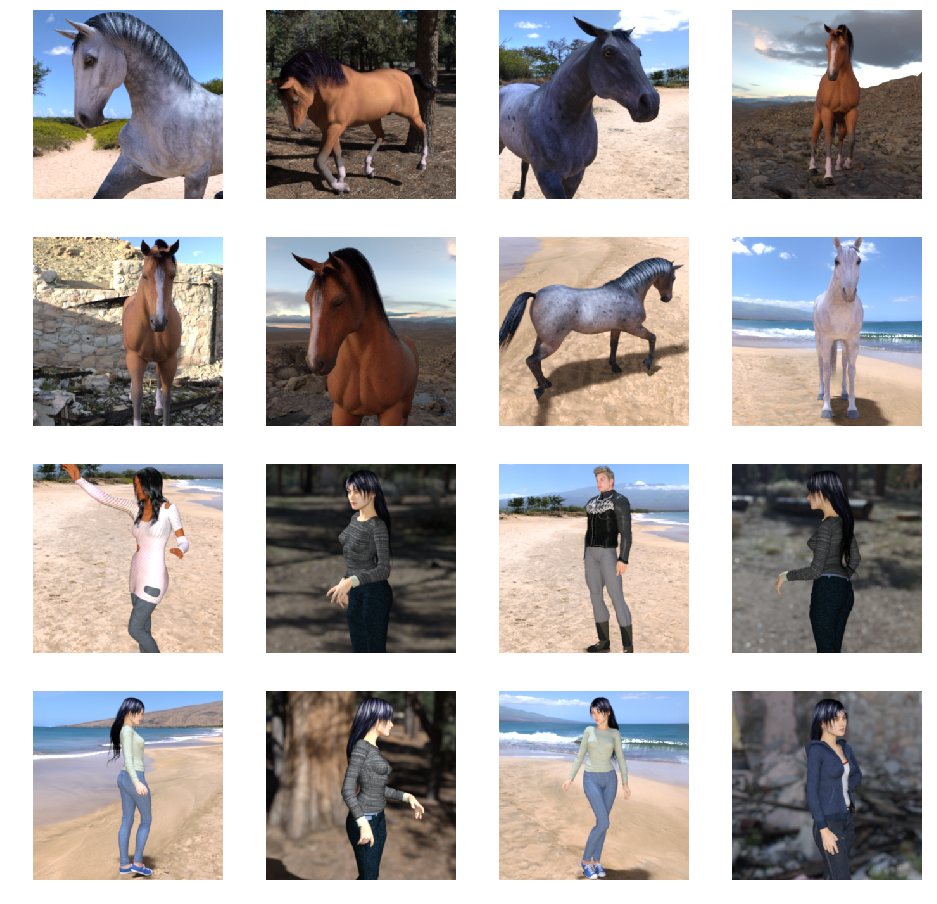

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/datadrive/dataForSamplePrograms/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/datadrive/dataForSamplePrograms/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 27s 3s/step - loss: 1.5384 - acc: 0.5139 - val_loss: 0.7169 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 24s 3s/step - loss: 0.6758 - acc: 0.5850 - val_loss: 0.5077 - val_acc: 0.8555
Epoch 3/15
8/8 [==============================] - 22s 3s/step - loss: 2.6031 - acc: 0.7075 - val_loss: 0.3967 - val_acc: 0.8594
Epoch 4/15
8/8 [==============================] - 19s 2s/step - loss: 0.2729 - acc: 0.8811 - val_loss: 0.8110 - val_acc: 0.8047
Epoch 5/15
8/8 [==============================] - 24s 3s/step - loss: 0.2012 - acc: 0.9229 - val_loss: 0.6688 - val_acc: 0.8867
Epoch 6/15
8/8 [==============================] - 19s 2s/step - loss: 0.3854 - acc: 0.8501 - val_loss: 1.2737 - val_acc: 0.8203
Epoch 7/15
8/8 [==============================] - 26s 3s/step - loss: 0.1944 - acc: 0.9355 - val_loss: 1.6843 - val_acc: 0.8008
Epoch 8/15
8/8 [==============================] - 21s 3s/step - loss: 0.1254 - acc: 0.9455 - val_loss: 1

In [19]:
from keras.preprocessing import image
import numpy as np

## Test with test images
test_img_path = '/datadrive/dataForSamplePrograms/test-horse-or-human/'
for eachimage in os.listdir(test_img_path):
    imgs = image.load_img(test_img_path+eachimage, target_size=(300,300))
    x = image.img_to_array(imgs)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(eachimage + " is a human")
    else:
        print(eachimage + " is a horse")


[0.]
human_1.jpg is a horse
[1.]
horse_1.jpg is a human
[0.]
horse_2.jpg is a horse
[0.]
horse_3.jpg is a horse
[0.]
human_3.jpg is a horse
[1.]
human_4.jpg is a human
[1.]
horse_human.jpg is a human
[0.]
human_5.jpg is a horse


In [12]:
os.listdir('/datadrive/dataForSamplePrograms/test-horse-or-human')

['human_1.jpg',
 'horse_1.jpg',
 'horse_2.jpg',
 'horse_3.jpg',
 'human_3.jpg',
 'human_4.jpg',
 'horse_human.jpg',
 'human_5.jpg']

max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4


/home/vmadmin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


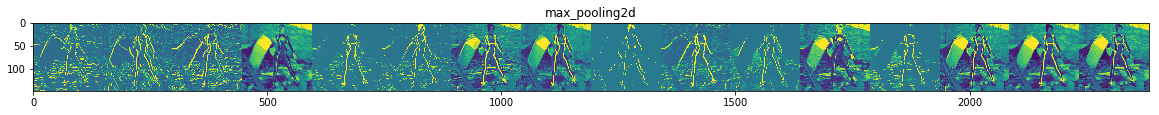

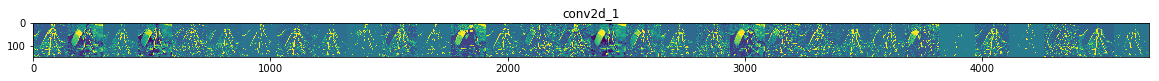

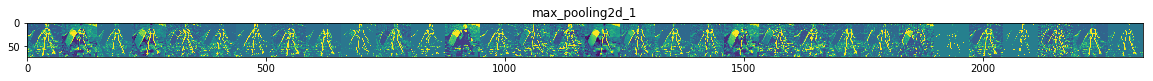

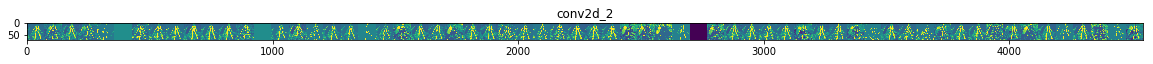

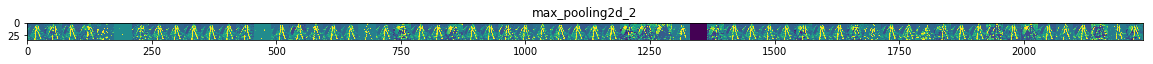

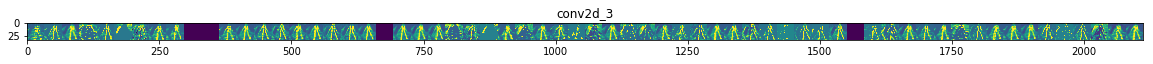

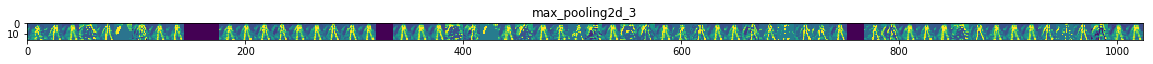

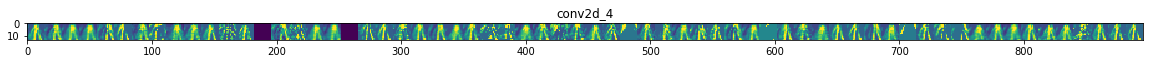

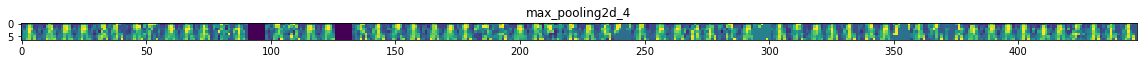

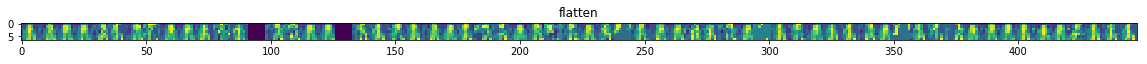

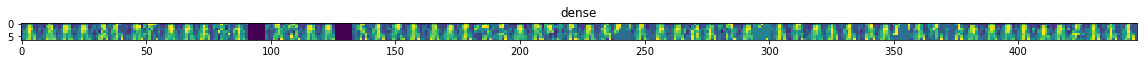

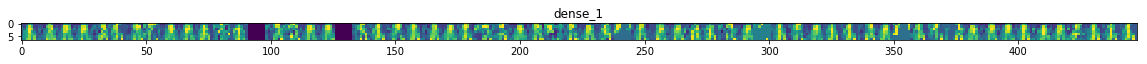

In [23]:
## Visualizing Intermediate representations

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        print(layer_name)
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
## cleanup
import os, signal
os.kill(os.getpid(), signal.SIGKILL)